BATTING PERFORMANCE ANALYSIS IN IPL


1) IMPORTING PANDAS

In [ ]:
import pandas as pd

2) LOAD THE CSV

In [2]:
df=pd.read_csv("ATB.csv")
df.head()

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Virat Kohli,RCB,237,229,34,7263,113,37.25,5586,130.02,7,50,643,234
1,2,Shikhar Dhawan,PKBS,217,216,29,6617,106*,35.39,5203,127.18,2,50,750,148
2,3,David Warner,DC,176,176,22,6397,126,41.54,4572,139.92,4,60,646,226
3,4,Rohit Sharma,MI,243,238,28,6211,109*,29.58,4776,130.05,1,42,554,257
4,5,Suresh Raina,CSK,205,200,30,5528,100*,32.52,4042,136.76,1,39,506,203


3) CLEANING AND TRANSFORMING THE DATA

In [7]:

df.isnull().sum()

df['Avg'] = pd.to_numeric(df['Avg'], errors='coerce')

df = df.dropna(subset=['Avg'])


4) FINAL ANALYSIS

In [6]:
final_df = df[['Player', 'Team', 'Mat', 'Runs', 'Avg', 'SR', '100', '50', '4s', '6s']]
final_df.head()

,Player,Team,Mat,Runs,Avg,SR,100,50,4s,6s
0,Virat Kohli,RCB,237,7263,37.25,130.02,7,50,643,234
1,Shikhar Dhawan,PKBS,217,6617,35.39,127.18,2,50,750,148
2,David Warner,DC,176,6397,41.54,139.92,4,60,646,226
3,Rohit Sharma,MI,243,6211,29.58,130.05,1,42,554,257
4,Suresh Raina,CSK,205,5528,32.52,136.76,1,39,506,203


5) TOP 10 RUN SCORERS GRAPH

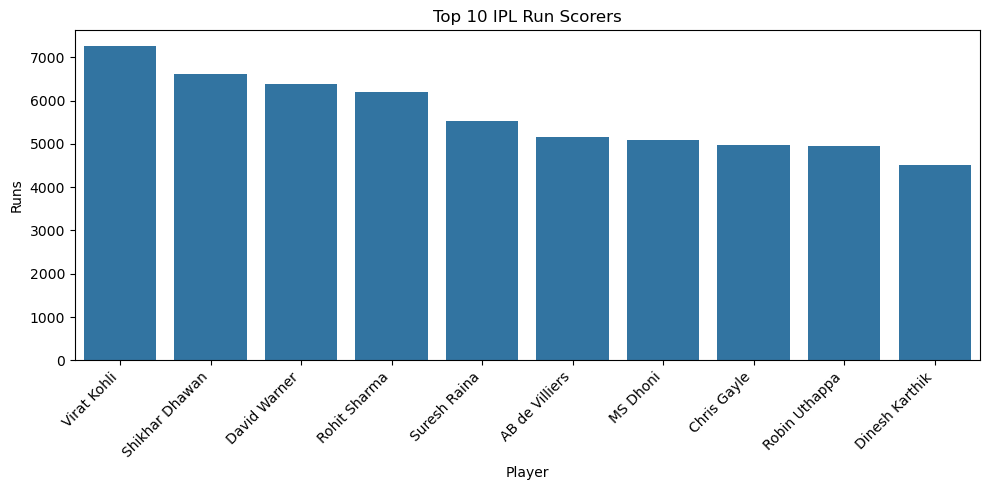

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top10_runs = df.sort_values('Runs', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Player', y='Runs', data=top10_runs)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 IPL Run Scorers')
plt.tight_layout()
plt.show()

6) AVERAGE vs STRIKE RATE - KEY INSIGHT TO ANALYZE

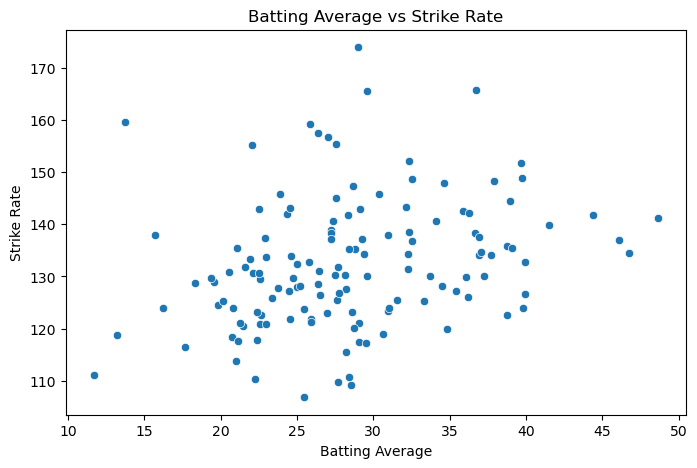

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Avg', y='SR', data=df)
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.title('Batting Average vs Strike Rate')
plt.show()

7) BATSMANS WHO SCORED RUNS BY MOST NUMBER OF BOUNDARIES

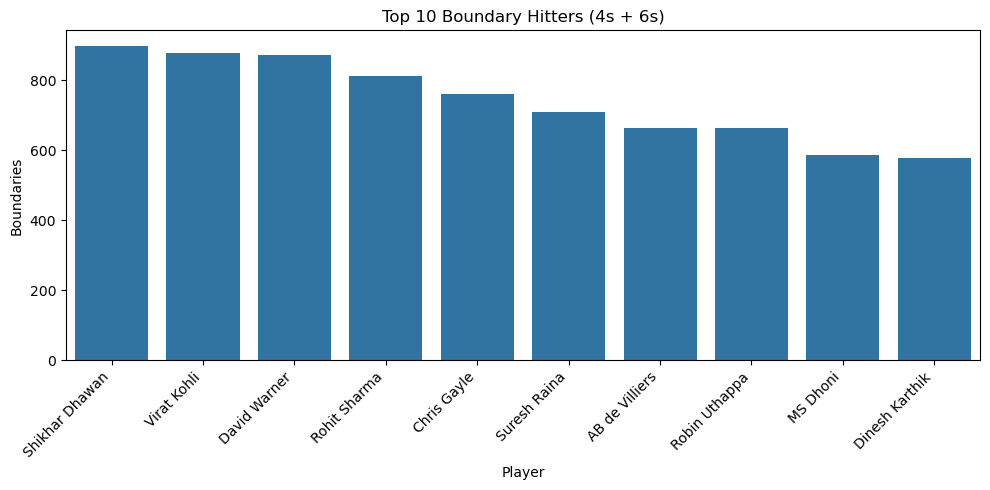

In [11]:
df['Boundaries'] = df['4s'] + df['6s']

top_boundaries = df.sort_values('Boundaries', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Player', y='Boundaries', data=top_boundaries)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Boundary Hitters (4s + 6s)')
plt.tight_layout()
plt.show()

8) BATTING DOMINANCE BY TEAM-WISE

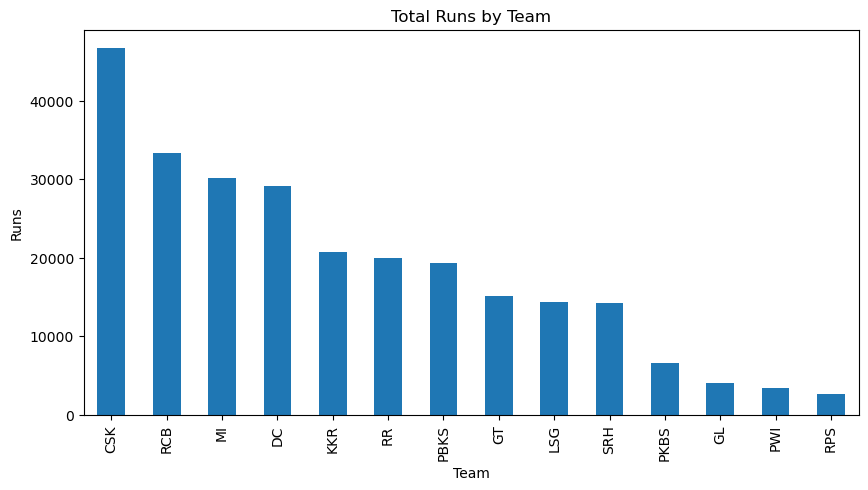

In [12]:
team_runs = df.groupby('Team')['Runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
team_runs.plot(kind='bar')
plt.title('Total Runs by Team')
plt.ylabel('Runs')
plt.show()